In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp, rescale, resize, downscale_local_mean
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import torchvision
from torchvision import transforms
import random

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# location on Google Drive
master_path = '/content/gdrive/My Drive/Colab Notebooks/Pokemon Sprite Project/'

Mounted at /content/gdrive


(64, 64, 4)


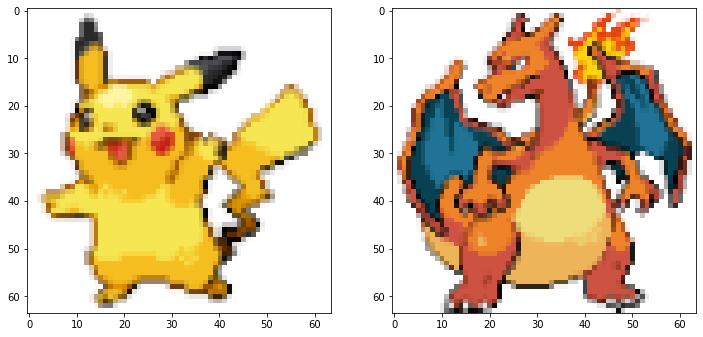

In [ ]:
image = io.imread(master_path + '/pika.png')
image2 = io.imread(master_path + '/zard.png')
print(image2.shape)

fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)


plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(image2)


In [ ]:
def spin(img, ang):
  if ang < -90:
    ang = -90
  if ang > 90:
    ang = 90
  rotated = rotate(img, angle=ang, mode = 'constant')
  return rotated

def translate(img,x,y):
  if (x > 16) or (y > 16):
    transform = AffineTransform(translation=(16,16))
  else:
    transform = AffineTransform(translation=(x,y))
  moved = warp(img,transform,mode='constant')
  return moved

def shift(img,x,y):
  transform = AffineTransform(translation=(x,y))
  wrapShift = warp(img,transform,mode='wrap')
  return wrapShift

def flipHor(img):
  flipLR = np.fliplr(img)
  return flipLR

def flipVer(img):
  flipUD = np.flipud(img)
  return flipUD

def crop(img, c):
  if c >= 32:
    c = 16
  cropped = img[c:(img.shape[0]-c),c:(img.shape[1]-c)]
  scaleFactor = img.shape[0]/(img.shape[0] - 2.0*c)
  resized = resize(cropped, (cropped.shape[0] * scaleFactor, cropped.shape[1] * scaleFactor), anti_aliasing=True)
  return resized


# spin(image,45)
# translate(image,12,12)
# shift(image,20,30)
# flipHor(image)
# flipVer(image)
# crop(image,10)



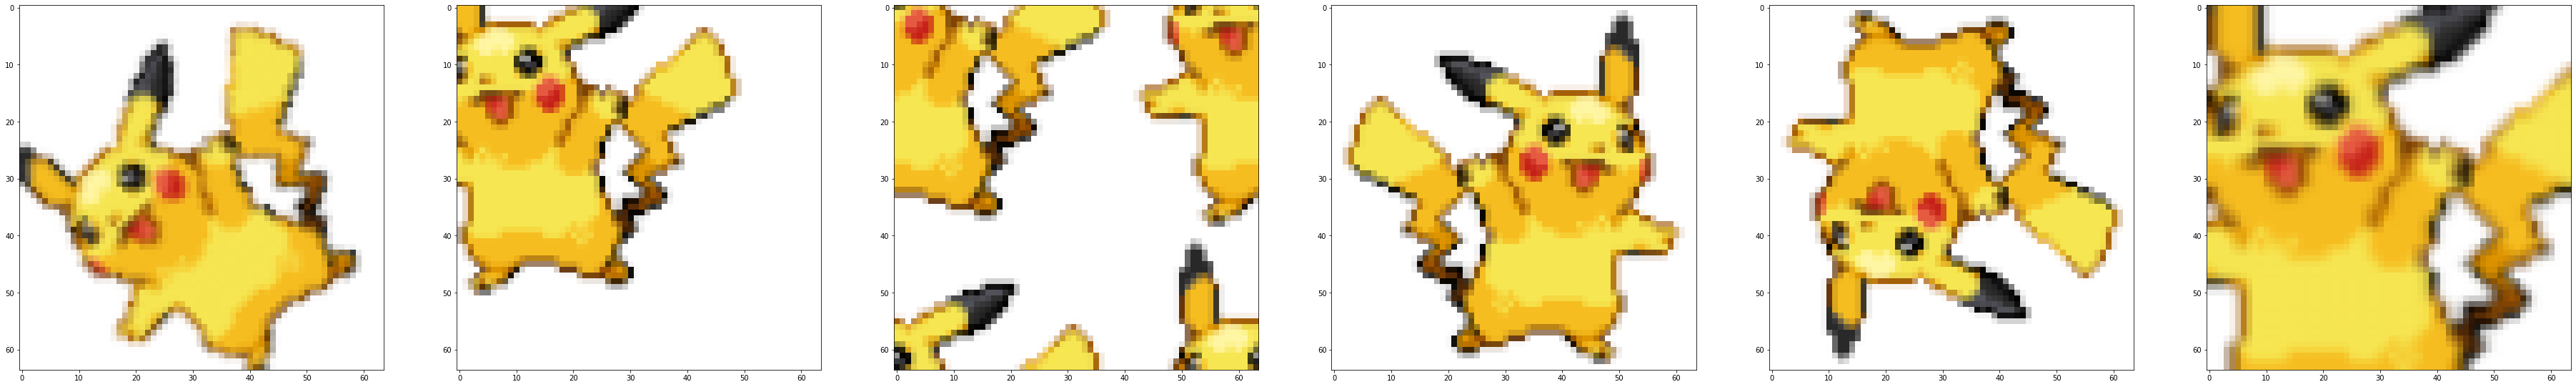

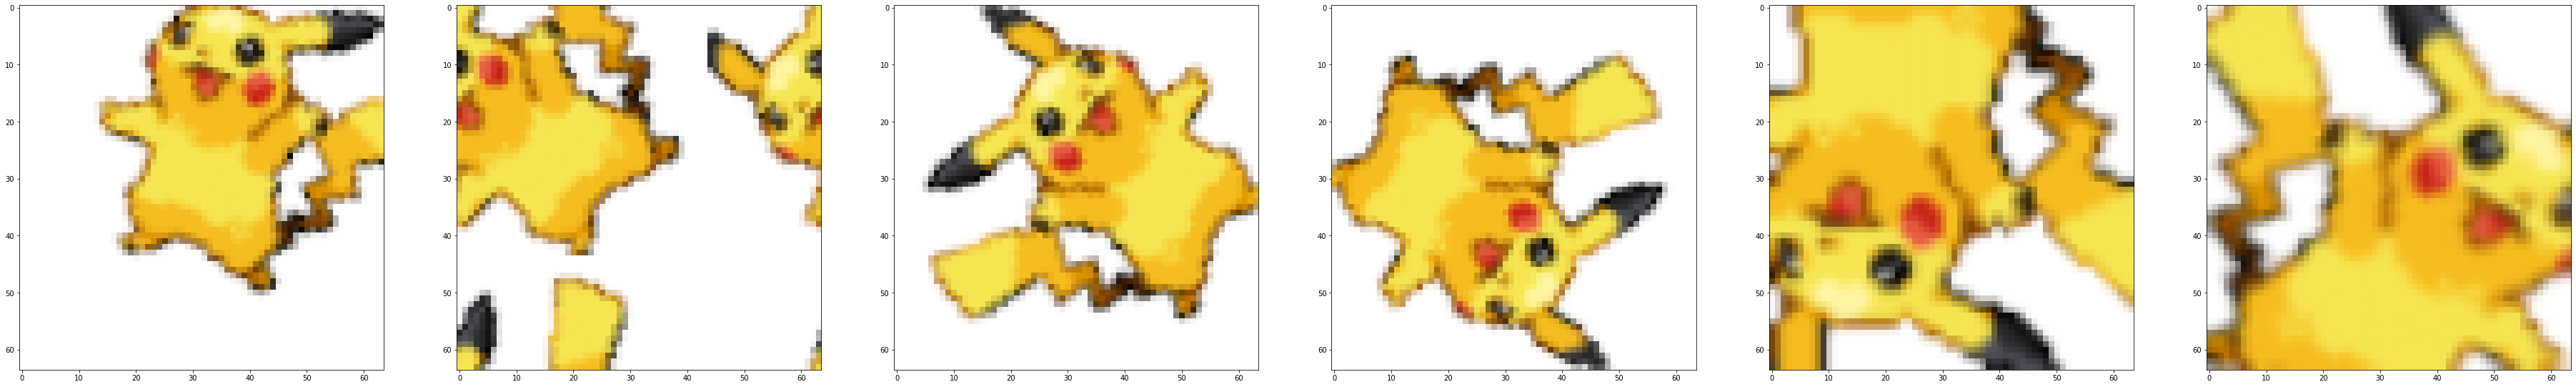

In [ ]:
def stackTransform(img, ang=45, transX=12, transY=12, shiftX=24, shiftY=24, c=10):
  # Subplot1
  fig = plt.figure()
  fig.set_figheight(64)
  fig.set_figwidth(64)
  plotX = 6
  plotY = 1
  
  # Rotate
  if ang < -90:
    ang = -90
  if ang > 90:
    ang = 90
  rotated = rotate(img, angle=ang, mode = 'constant')
  plt.subplot(plotY,plotX,1)
  plt.imshow(rotated)

  # Translate
  if (transX > 16) or (transY > 16):
    transform = AffineTransform(translation=(16,16))
  else:
    transform = AffineTransform(translation=(transX,transY))
  moved = warp(img,transform,mode='constant')
  plt.subplot(plotY,plotX,2)
  plt.imshow(moved)

  # Warp Shift
  warpTrans = AffineTransform(translation=(shiftX,shiftY))
  wrapShift = warp(img,warpTrans,mode='wrap')
  plt.subplot(plotY,plotX,3)
  plt.imshow(wrapShift)

  # Horizontal Flip
  flipLR = np.fliplr(img)
  plt.subplot(plotY,plotX,4)
  plt.imshow(flipLR)

  # Vertical Flip
  flipUD = np.flipud(img)
  plt.subplot(plotY,plotX,5)
  plt.imshow(flipUD)

  # Crop and resize
  if c >= 32:
    c = 16
  cropped = img[c:(img.shape[0]-c),c:(img.shape[1]-c)]
  scaleFactor = img.shape[0]/(img.shape[0] - 2.0*c)
  resized = resize(cropped, (cropped.shape[0] * scaleFactor, cropped.shape[1] * scaleFactor), anti_aliasing=True)
  plt.subplot(plotY,plotX,6)
  plt.imshow(resized)
  plt.show()
  ##############################
  
  # Subplot2
  fig = plt.figure()
  fig.set_figheight(image.shape[0])
  fig.set_figwidth(image.shape[1])
  plotX = 6
  plotY = 1

  # rotate + translation
  combo1 = translate(spin(img,-20),-12,12)
  plt.subplot(plotY,plotX,1)
  plt.imshow(combo1)

  # rotate + wrap shift
  combo2 = shift(spin(img,45),20,20)
  plt.subplot(plotY,plotX,2)
  plt.imshow(combo2)

  # rotate + horizontal flip
  combo3 = spin(flipHor(img),60)
  plt.subplot(plotY,plotX,3)
  plt.imshow(combo3)

  # rotate + vertical flip
  combo4 = spin(flipVer(img),60)
  plt.subplot(plotY,plotX,4)
  plt.imshow(combo4)

  # Crop + Vertical flip
  combo5 = flipVer(crop(img,10))
  plt.subplot(plotY,plotX,5)
  plt.imshow(combo5)

  # rotate + Horizontal flip + crop
  combo6 = crop(spin(flipHor(img),-30),10)
  plt.subplot(plotY,plotX,6)
  plt.imshow(combo6)


stackTransform(image)

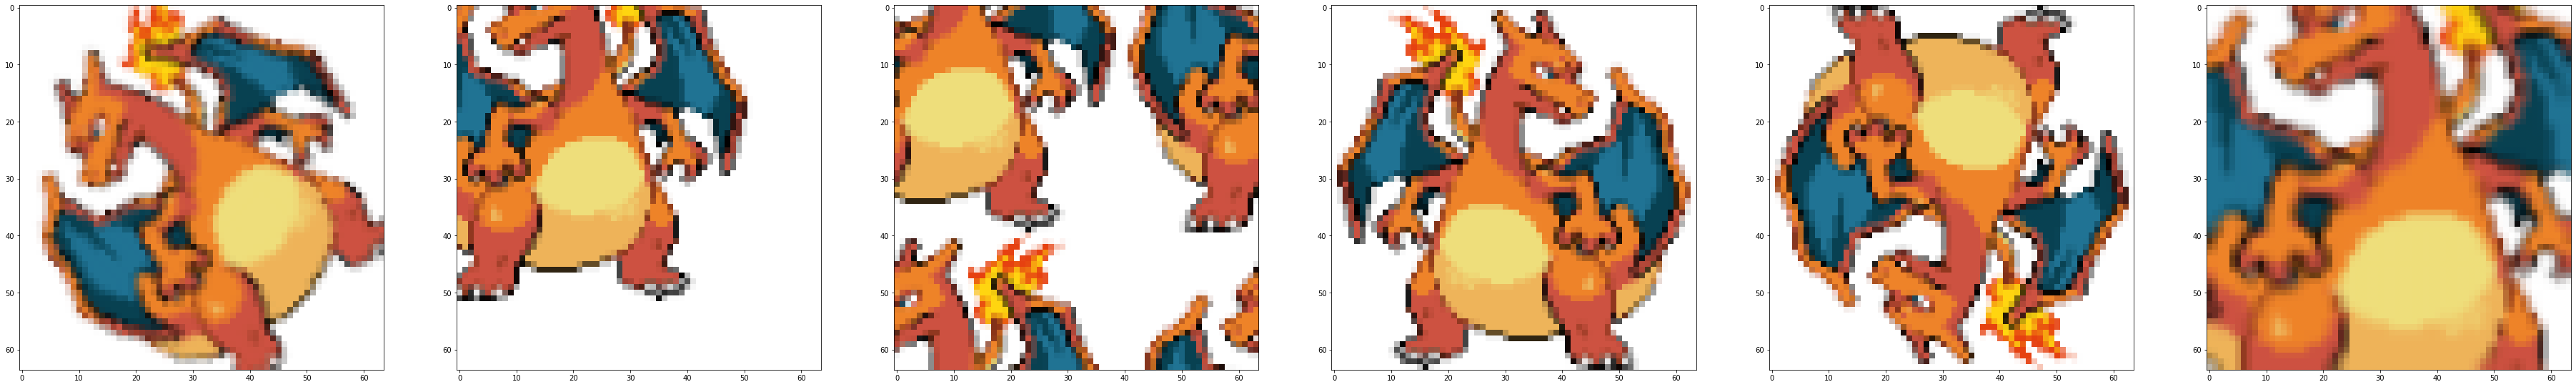

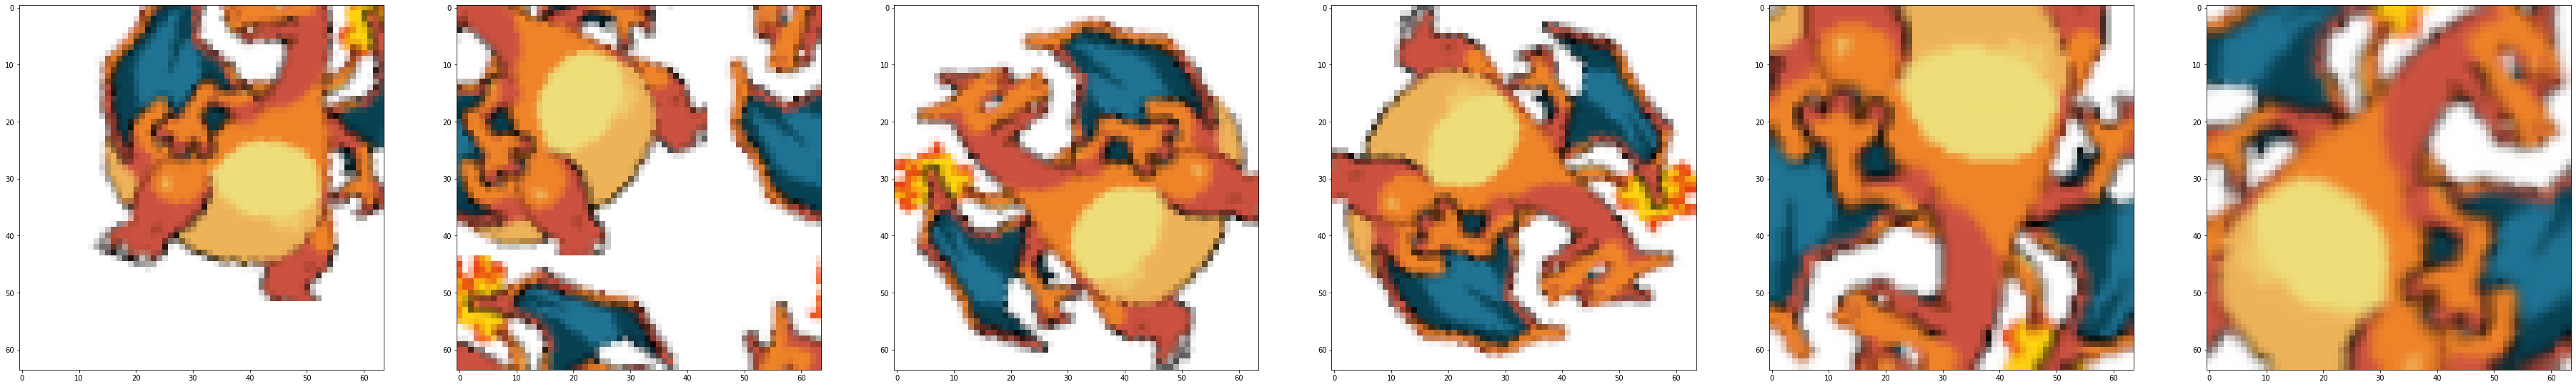

In [ ]:
stackTransform(image2)

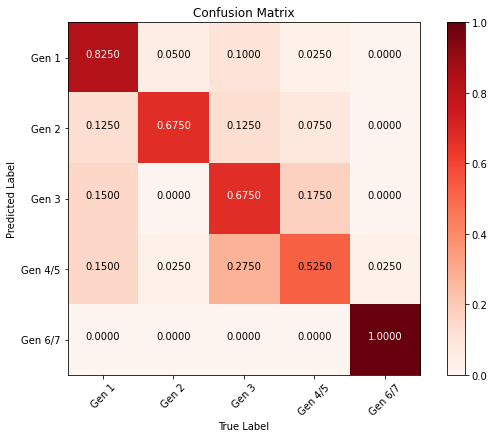

In [4]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Reds')

    plt.figure(figsize=(8, 6))

    plt.title(title)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted Label')#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('True Label')
    plt.show()

plot_confusion_matrix(cm = np.array([[33,  2,  4,  1,  0],
 [ 5, 27,  5,  3,  0],
 [ 6,  0, 27,  7,  0],
 [ 6,  1, 11, 21,  1],
 [ 0,  0,  0,  0, 40]]), 
                      normalize    = True,
                      target_names = ['Gen 1', 'Gen 2', 'Gen 3', "Gen 4/5", "Gen 6/7" ],
                      title        = "Confusion Matrix")

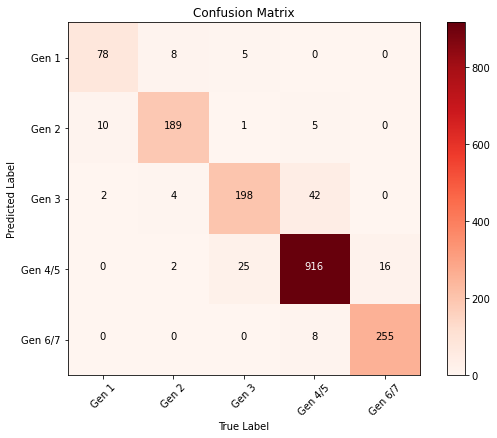

In [85]:
import numpy as np


def plot_confusion_matrix2(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Reds')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    
    


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted Label')#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('True Label')
    plt.show()

plot_confusion_matrix2(cm = np.array([[ 78,   8,   5,   0,   0],
 [ 10, 189,   1,   5,   0],
 [  2,   4, 198,  42,   0],
 [  0,   2,  25, 916,  16],
 [  0,   0,   0,   8, 255]]), 
                      normalize    = False,
                      target_names = ['Gen 1', 'Gen 2', 'Gen 3', "Gen 4/5", "Gen 6/7" ],
                      title        = "Confusion Matrix")